In [ ]:
# data/simulate_ecg_and_save.py

import numpy as np
import pandas as pd

def simulate_ecg(n_samples=5000, fs=360, noise=0.05, anomaly_ratio=0.05):
    t = np.arange(n_samples) / fs
    ecg = 1.2 * np.sin(2 * np.pi * 1.33 * t)  # Simulate PQRST with sin
    ecg += noise * np.random.randn(n_samples)

    # Inject anomalies
    anomaly_indices = np.random.choice(n_samples, int(anomaly_ratio * n_samples), replace=False)
    ecg[anomaly_indices] += np.random.normal(2.5, 0.5, size=len(anomaly_indices))

    return pd.DataFrame({'ECG': ecg, 'Time': t})

def extract_features(signal, window_size=180):
    features = []
    for start in range(0, len(signal) - window_size, window_size):
        segment = signal[start:start + window_size]
        feat = {
            'mean': segment.mean(),
            'std': segment.std(),
            'min': segment.min(),
            'max': segment.max(),
            'kurt': pd.Series(segment).kurt(),
            'skew': pd.Series(segment).skew(),
        }
        features.append(feat)
    return pd.DataFrame(features)

def save_features_to_csv(filename="../data/ecg_features.csv"):
    df = simulate_ecg()
    df.to_csv("../data/ecg_data.csv", index=False)
    feature_df = extract_features(df["ECG"])
    feature_df.to_csv(filename, index=False)
    print(f"Saved to {filename}")

if __name__ == "__main__":
    save_features_to_csv()


Saved to ecg_features.csv


In [ ]:
df = pd.read_csv("../data/ecg_data.csv")

In [64]:
df

,ECG,Time
0,0.031373,0.000000
1,0.057770,0.002778
2,-0.043962,0.005556
3,0.136942,0.008333
4,0.127039,0.011111
...,...,...
4995,0.341626,13.875000
4996,0.279794,13.877778
4997,0.205529,13.880556
4998,0.190672,13.883333


In [65]:
window_size=180

In [66]:
for start in range(0, len(df["ECG"]) - window_size, window_size):
        segment = df["ECG"][start:start + window_size]
        break # for first segment

In [67]:
segment

0      0.031373
1      0.057770
2     -0.043962
3      0.136942
4      0.127039
         ...   
175    1.820890
176   -0.982617
177   -1.040121
178   -1.007910
179   -1.040760
Name: ECG, Length: 180, dtype: float64

In [68]:
df[:180] # first segment

,ECG,Time
0,0.031373,0.000000
1,0.057770,0.002778
2,-0.043962,0.005556
3,0.136942,0.008333
4,0.127039,0.011111
...,...,...
175,1.820890,0.486111
176,-0.982617,0.488889
177,-1.040121,0.491667
178,-1.007910,0.494444


<Axes: xlabel='Time'>

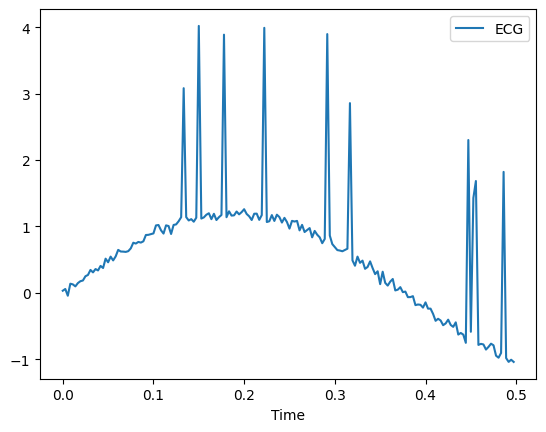

In [69]:
df[:180].plot(x="Time",y="ECG")

In [70]:
# pip install neurokit2

In [71]:
# pip install wfdb

In [ ]:
df_f=pd.read_csv("../data/ecg_features.csv") # segments statistical features

In [73]:
df_f

,mean,std,min,max,kurt,skew
0,0.580926,0.882329,-1.040760,4.018943,3.552332,1.040457
1,0.111987,1.108745,-1.273100,3.813053,0.186086,0.615271
2,-0.280278,0.946228,-1.262914,3.962624,3.161229,1.554543
3,0.552388,0.830622,-1.048311,3.671549,2.208400,0.664113
4,0.143881,1.111695,-1.294940,3.837644,0.102580,0.568184
5,-0.306254,0.842938,-1.257690,3.169309,1.309112,1.130532
6,0.555879,0.859524,-1.027656,4.413116,3.725044,1.055563
7,0.142490,1.098353,-1.244146,4.238452,0.177473,0.566118
8,-0.268263,0.891181,-1.303553,3.217022,0.962874,1.105799
9,0.558429,0.812623,-0.931275,4.396910,5.259470,1.181433


In [74]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import joblib

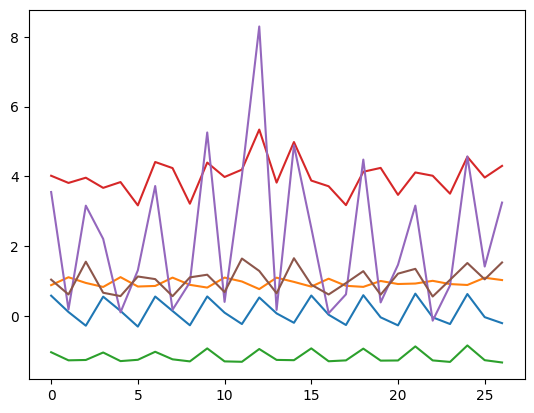

In [75]:
plt.plot(df_f)

When you plot your windowed features—say mean (red), standard deviation (purple), min, max, etc.—you’re really peeking at how each slice of your ECG/EEG signal “behaves” over time. Anomalies will tend to stand out as windows where one or more features deviate sharply from their normal range. Here’s how to read that plot:

Identify Feature “Spikes”

Spikes in a feature (e.g. a very tall purple line at index 11) usually mean that window has an unusually high variability (std) compared to the rest of the recording.

Similarly, a sudden jump or drop in mean, max, or min suggests the signal amplitude in that window is abnormal.

Corroborate Across Multiple Features

True anomalies often show up in several features at once.

For example, at window 11 in your plot:

Std (purple) shoots up to ~8

Mean (red) also briefly peaks higher than its typical ~4

That double-whammy is a strong anomaly signature.

 compute an anomaly score and then mark the “outlier” windows right on this plot:

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_f)

In [77]:
X_scaled

array([[ 1.3066805 , -0.65723977,  0.82449755,  0.02684844,  0.62174652,
         0.00978153],
       [-0.04555651,  1.4921046 , -0.61283436, -0.39293222, -1.00274157,
        -1.18212001],
       [-1.1766945 , -0.05065004, -0.54981793, -0.08797797,  0.43300768,
         1.4508929 ],
       [ 1.22438855, -1.14809856,  0.77778502, -0.68143787, -0.02681023,
        -1.04520364],
       [ 0.04641339,  1.5201158 , -0.74794313, -0.34279542, -1.04304006,
        -1.31411494],
       [-1.25159743, -1.03118272, -0.51750478, -1.70543296, -0.46079022,
         0.26228423],
       [ 1.23445464, -0.8737298 ,  0.9055654 ,  0.83050919,  0.70509402,
         0.05212648],
       [ 0.04240415,  1.3934612 , -0.43371764,  0.47439402, -1.00689804,
        -1.31990808],
       [-1.14204807, -0.57321619, -0.80122745, -1.60815296, -0.62787813,
         0.19295134],
       [ 1.24180739, -1.31895314,  1.50180904,  0.79746839,  1.44557998,
         0.40497187],
       [-0.09967702,  1.40610622, -0.7991924 , -0.

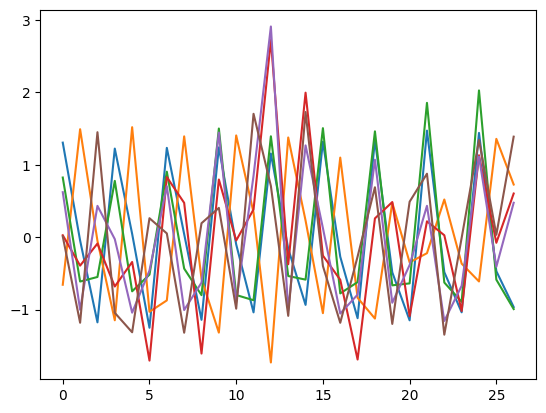

In [78]:
plt.plot(X_scaled)

In [79]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.1, random_state=42) # 10% data to be anomalies


In [80]:
model

IsolationForest(contamination=0.1, random_state=42)

Isolation Forest is an unsupervised anomaly detection algorithm that isolates observations by randomly selecting:

A feature

A split value between the min and max of that feature

Key Insight:
Anomalies are easier to isolate: they are few and different.

So, they will be isolated in fewer splits compared to normal points.

How It Works (Conceptually)

Imagine your data as points in a forest:

Build a tree by randomly splitting the data

Measure how deep a data point goes in the tree before being isolated

Shorter path = more likely to be an anomaly

Repeat over many trees → take average path length → compute anomaly score.

In [81]:
model.fit(X_scaled)

IsolationForest(contamination=0.1, random_state=42)

In [83]:
df_f["anomaly"] = model.predict(X_scaled)

In [84]:
df_f

,mean,std,min,max,kurt,skew,anomaly
0,0.580926,0.882329,-1.040760,4.018943,3.552332,1.040457,1
1,0.111987,1.108745,-1.273100,3.813053,0.186086,0.615271,1
2,-0.280278,0.946228,-1.262914,3.962624,3.161229,1.554543,1
3,0.552388,0.830622,-1.048311,3.671549,2.208400,0.664113,-1
4,0.143881,1.111695,-1.294940,3.837644,0.102580,0.568184,1
5,-0.306254,0.842938,-1.257690,3.169309,1.309112,1.130532,1
6,0.555879,0.859524,-1.027656,4.413116,3.725044,1.055563,1
7,0.142490,1.098353,-1.244146,4.238452,0.177473,0.566118,1
8,-0.268263,0.891181,-1.303553,3.217022,0.962874,1.105799,1
9,0.558429,0.812623,-0.931275,4.396910,5.259470,1.181433,1


In [ ]:
joblib.dump(model, "../models/ecg_iso_forest_model.pkl")
joblib.dump(scaler, "../models/ecg_scaler.pkl")

['models/ecg_scaler.pkl']

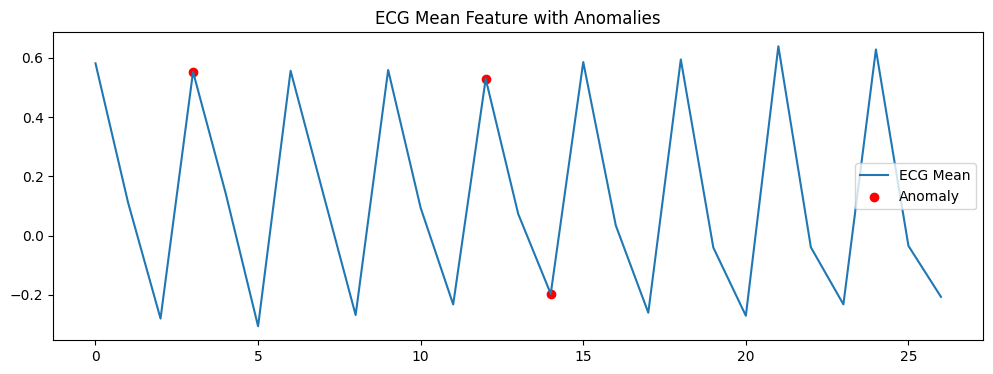

In [89]:
plt.figure(figsize=(12, 4))
plt.plot(df_f["mean"], label="ECG Mean")
plt.scatter(df_f.index[df_f["anomaly"] == -1], df_f["mean"][df_f["anomaly"] == -1], color="red", label="Anomaly")
plt.legend()
plt.title("ECG Mean Feature with Anomalies")
plt.show()

-1 → Anomalous

1 → Normal

So the df["anomaly"] column now contains:

-1: predicted anomaly

1: predicted normal data

Anomaly Score

s(x) = 2^(-E(h(x)) / c(n))


Where:

E(h(x)): average path length from root to the point x

c(n): average path length of n samples in a Binary Search Tree

Then:

If s(x) ≈ 1, it's highly anomalous

If s(x) ≈ 0.5, it's normal

Threshold set by contamination value

In [90]:
pip install streamlit

  Using cached streamlit-1.47.1-py3-none-any.whl.metadata (9.0 kB)
  Using cached pyarrow-21.0.0-cp311-cp311-win_amd64.whl.metadata (3.4 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
Using cached streamlit-1.47.1-py3-none-any.whl (9.9 MB)
   ---------------------------------------- 0.0/208.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/208.2 kB ? eta -:--:--
   ---------------------------------------- 208.2/208.2 kB 4.3 MB/s eta 0:00:00
Using cached pyarrow-21.0.0-cp311-cp311-win_amd64.whl (26.2 MB)
Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)
Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
Using cached gitdb-4.0.12-py3-none-any.whl (62 kB)
Using cached smmap-5.0.2-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
scores = model.decision_function(X_scaled)  # The higher, the more normal
df_f['anomaly_score'] = -scores  # Flip for easy plotting (higher = more anomalous)


In [93]:
df_f

,mean,std,min,max,kurt,skew,anomaly,anomaly_score
0,0.580926,0.882329,-1.040760,4.018943,3.552332,1.040457,1,-0.077233
1,0.111987,1.108745,-1.273100,3.813053,0.186086,0.615271,1,-0.093469
2,-0.280278,0.946228,-1.262914,3.962624,3.161229,1.554543,1,-0.061589
3,0.552388,0.830622,-1.048311,3.671549,2.208400,0.664113,-1,0.000193
4,0.143881,1.111695,-1.294940,3.837644,0.102580,0.568184,1,-0.066201
5,-0.306254,0.842938,-1.257690,3.169309,1.309112,1.130532,1,-0.030171
6,0.555879,0.859524,-1.027656,4.413116,3.725044,1.055563,1,-0.061174
7,0.142490,1.098353,-1.244146,4.238452,0.177473,0.566118,1,-0.034390
8,-0.268263,0.891181,-1.303553,3.217022,0.962874,1.105799,1,-0.060141
9,0.558429,0.812623,-0.931275,4.396910,5.259470,1.181433,1,-0.051020


In [94]:
df_f.sort_values("anomaly_score", ascending=False).head()


,mean,std,min,max,kurt,skew,anomaly,anomaly_score
12,0.528637,0.769166,-0.948652,5.342589,8.298229,1.289542,-1,0.113643
14,-0.196711,0.975787,-1.268833,4.985325,4.892320,1.653995,-1,0.003765
3,0.552388,0.830622,-1.048311,3.671549,2.208400,0.664113,-1,0.000193
24,0.627648,0.887118,-0.846172,4.561039,4.572592,1.516527,1,-0.000129
26,-0.206931,1.028239,-1.334618,4.301653,3.249639,1.532526,1,-0.008355


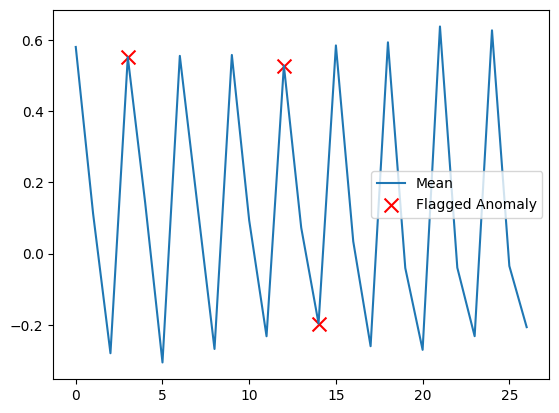

In [95]:
# after fitting:
scores = model.decision_function(X_scaled)          # higher = more “normal”
anomaly_flags = model.predict(X_scaled) == -1       # True for anomalies

# plot mean + highlight anomalies
plt.plot(df_f['mean'], label='Mean')
plt.scatter(df_f.index[anomaly_flags], 
            df_f['mean'][anomaly_flags], 
            color='red', marker='x', s=100, 
            label='Flagged Anomaly')
plt.legend()
plt.show()


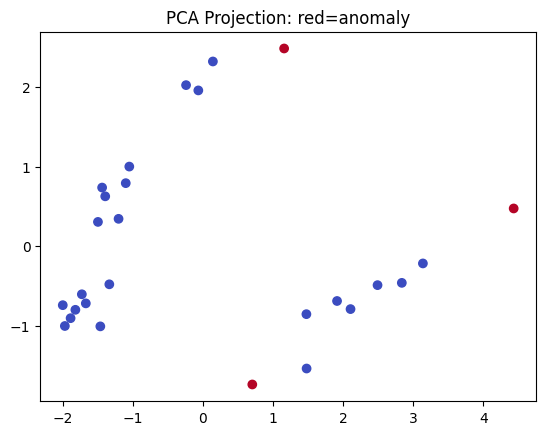

In [96]:
from sklearn.decomposition import PCA
pca = PCA(2)
coords = pca.fit_transform(X_scaled)
plt.scatter(coords[:,0], coords[:,1], c=anomaly_flags, cmap='coolwarm')
plt.title("PCA Projection: red=anomaly")
plt.show()
